# Деревья решений 

## Описание проекта

Этот проект посвящен разработке модели классификации на основе деревьев решений (Decision Trees) для определения вида пингвина на основании его физических характеристик. Мы используем набор данных "Palmer Penguins", чтобы оценить эффективность различных методов классификации на основе деревьев, таких как Decision Trees, Random Forests и Gradient Boosted Trees.

## Цель проекта

Наша основная цель — создать модель, которая сможет классифицировать виды пингвинов, опираясь на их физические атрибуты. Это позволит исследователям классифицировать пингвинов без посторонней помощи опытных биологов.

## Описание данных

Набор данных "Palmer Penguins" включает следующие переменные:

-   species: разновидности пингвинов (Chinstrap, Adélie, Gentoo)
-   culmen\_length\_mm: длина клюва (мм)
-   culmen\_depth\_mm: высота клюва (мм)
-   flipper\_length\_mm: длина крыла (мм)
-   body\_mass\_g: масса тела (г)
-   island: название острова (Dream, Torgersen, Biscoe)
-   sex: пол пингвина

Эти данные были собраны антарктической станцией Палмер и подробно описаны в работе: Gorman KB, Williams TD, Fraser WR (2014).

## Исследование данных (EDA)

-   Отсутствующие значения: Если встретятся отсутствующие данные, их количество будет оценено, и при необходимости такие данные будут удалены. Для новых данных предполагается наличие всех измерений.
-   Визуализация: Проведем ряд визуализаций, чтобы понять распределение данных и связи между различными переменными.
-   Построение признаков: Этап feature engineering будет включать выбор и создание новых признаков для повышения эффективности модели.

## Построение и оценка модели

Разработаем decision tree model, оценим её на тестовых данных, и сравним результаты с другими методами, такими как Random Forests и Gradient Boosted Trees. Мы также реализуем функцию для экспериментов с гиперпараметрами, которая будет возвращать результаты классификации и визуализировать дерево.

## Визуализация дерева

Визуализируем дерево решений, чтобы предварительно оценить его структуру и процесс принятия решений. Это поможет лучше понять, как модель классифицирует данные.

## Заключение

На основе анализа и визуализаций будут сделаны выводы о качестве и точности модели, а также об эффективности различных методов классификации деревьев.

---

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Исследование данных - EDA

### Отсутствующие значения - Missing Data

Если какие-то значения отсутствуют и их немного, то мы можем удалить такие данные. Однако для использования нашей будущей модели мы предполагаем, что для новых пингвинов все признаки будут измеряться без пропусков.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
# Какой процент данных мы удаляем?
100*(10/344)

2.9069767441860463

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df = df[df['sex']!='.']

## Визуализация

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

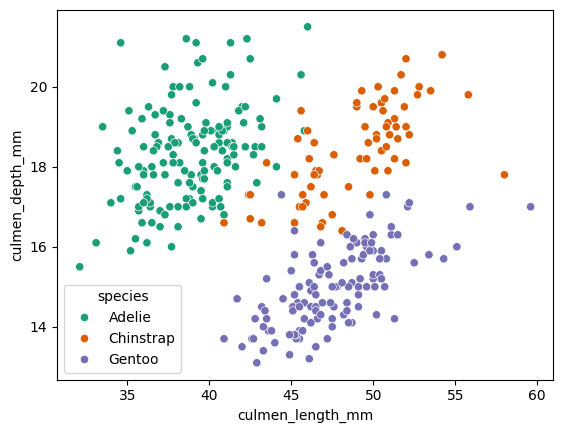

In [13]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

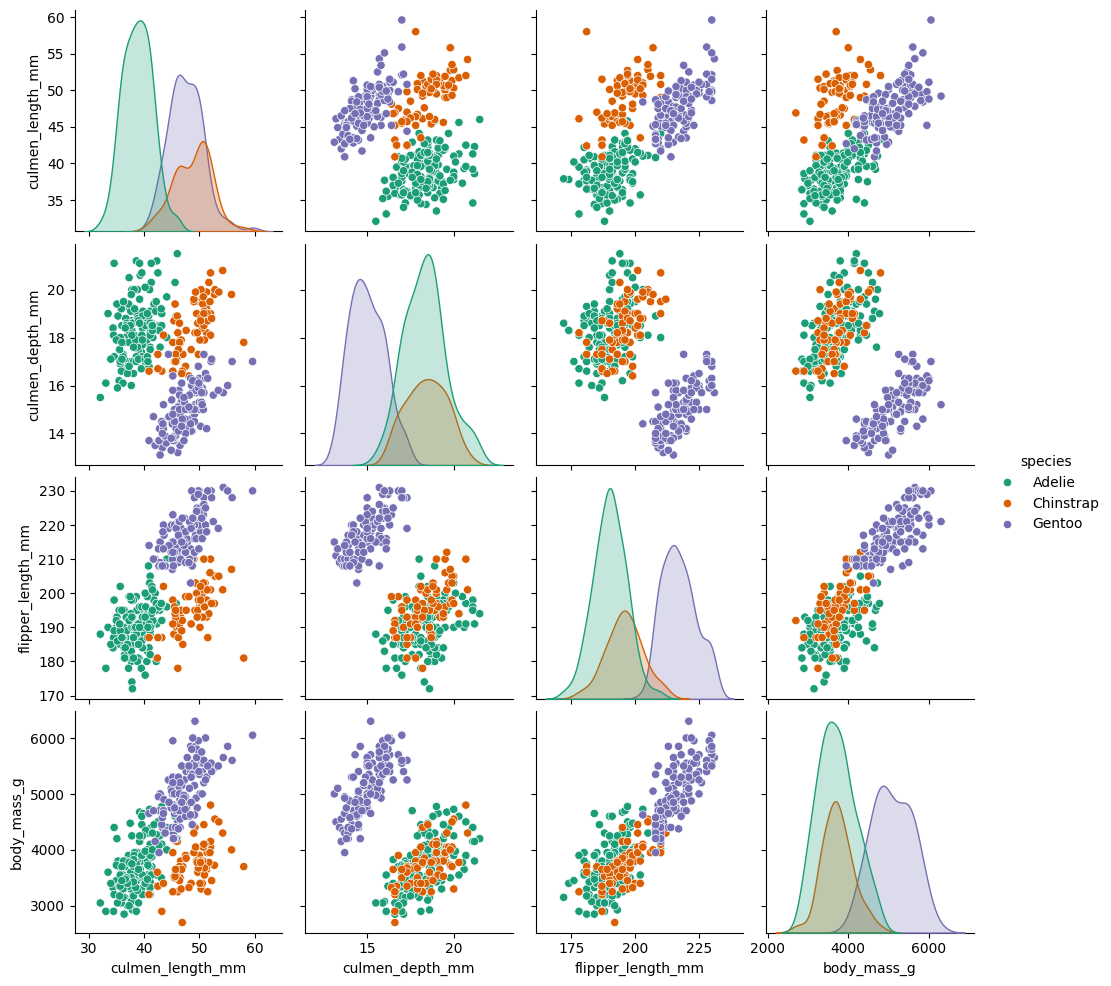

In [14]:
sns.pairplot(df,hue='species',palette='Dark2')

C:\Users\egorn\AppData\Local\Temp\ipykernel_235196\1926922542.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')


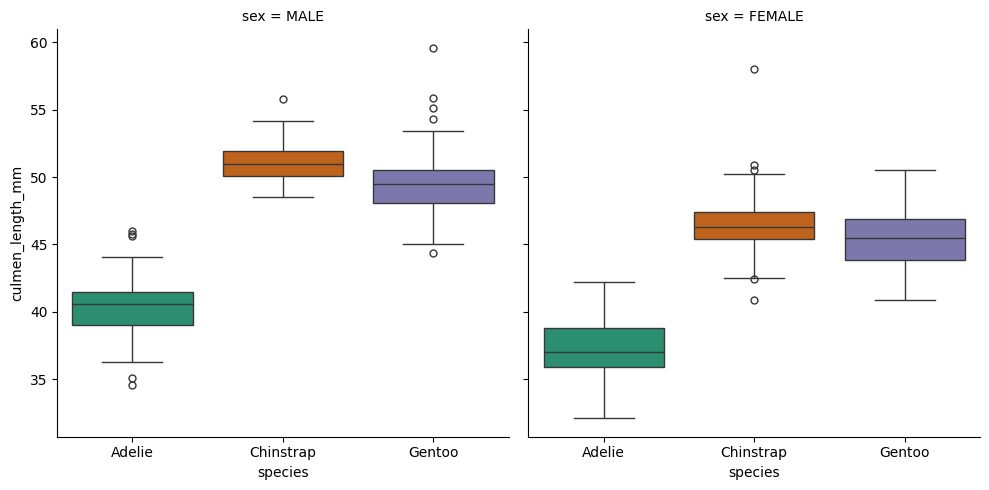

In [15]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Построение признаков - Feature Engineering

In [16]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,True,False


In [17]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [18]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Классификатор "Дерево решений" - Decision Tree Classifier

## Гиперпараметры по умолчанию

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
base_pred = model.predict(X_test)

## Оценка работы модели

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [27]:
confusion_matrix(y_test,base_pred)

array([[38,  2,  0],
       [ 5, 22,  0],
       [ 1,  0, 32]])

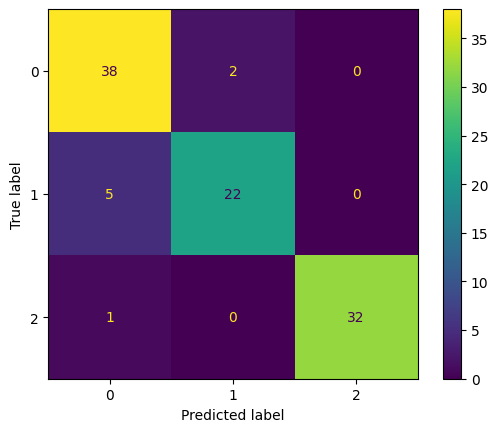

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test,base_pred)).plot()

In [31]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



In [32]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.58261583, 0.        , 0.03806069,
       0.        , 0.02571668])

In [33]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.333501
culmen_depth_mm,0.020106
flipper_length_mm,0.582616
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


<Axes: xlabel='species', ylabel='body_mass_g'>

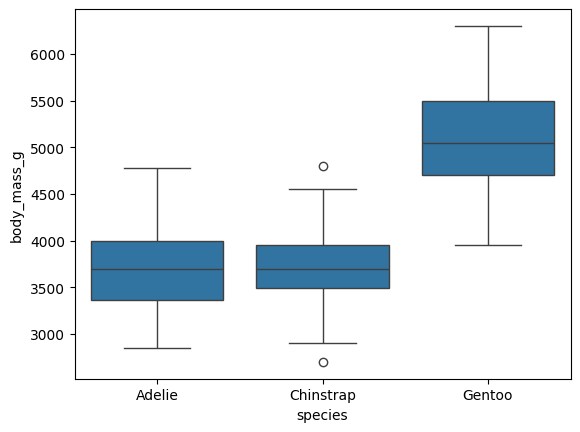

In [34]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## Визуализация дерева

Эта функция относительно новая, при желании Вы можете посмотреть онлайн-документацию:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [35]:
from sklearn.tree import plot_tree

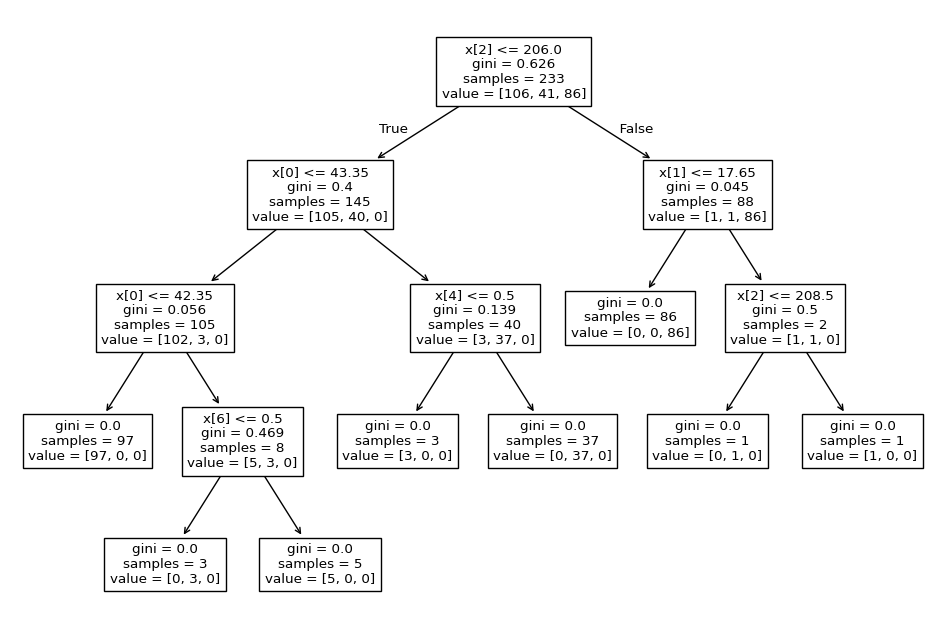

In [36]:
plt.figure(figsize=(12,8))
plot_tree(model);

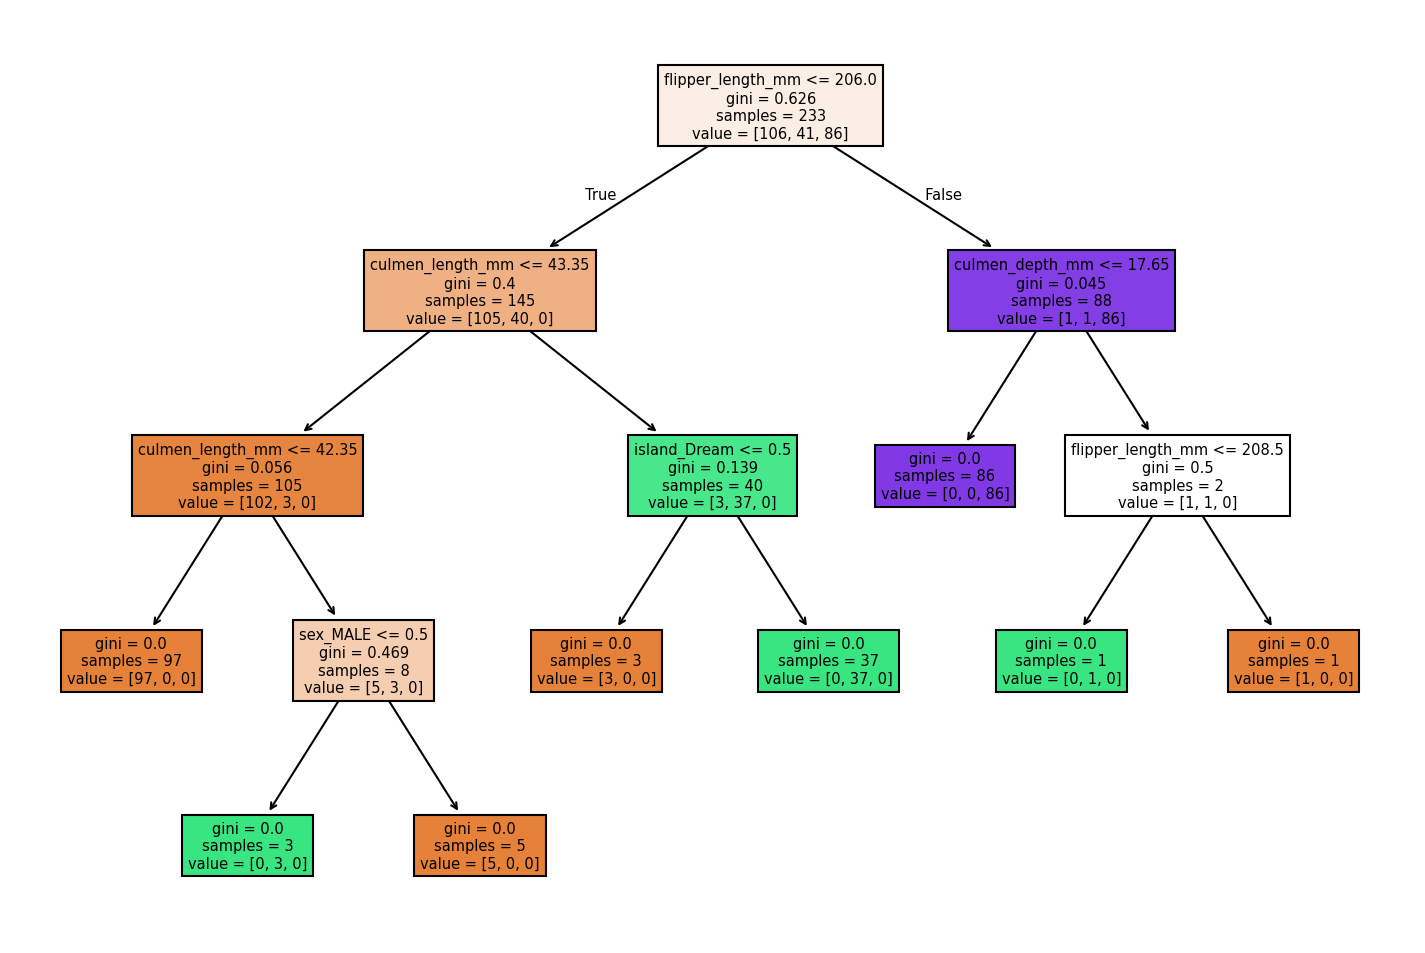

In [37]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Результаты модели

Чтобы поэкспериментировать с гиперпараметрами, давайте создадим функцию, которая возвращает результаты классификации, а также рисует дерево.

In [38]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Гиперпараметры

### Гиперпараметр "Max Depth"

In [39]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [40]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





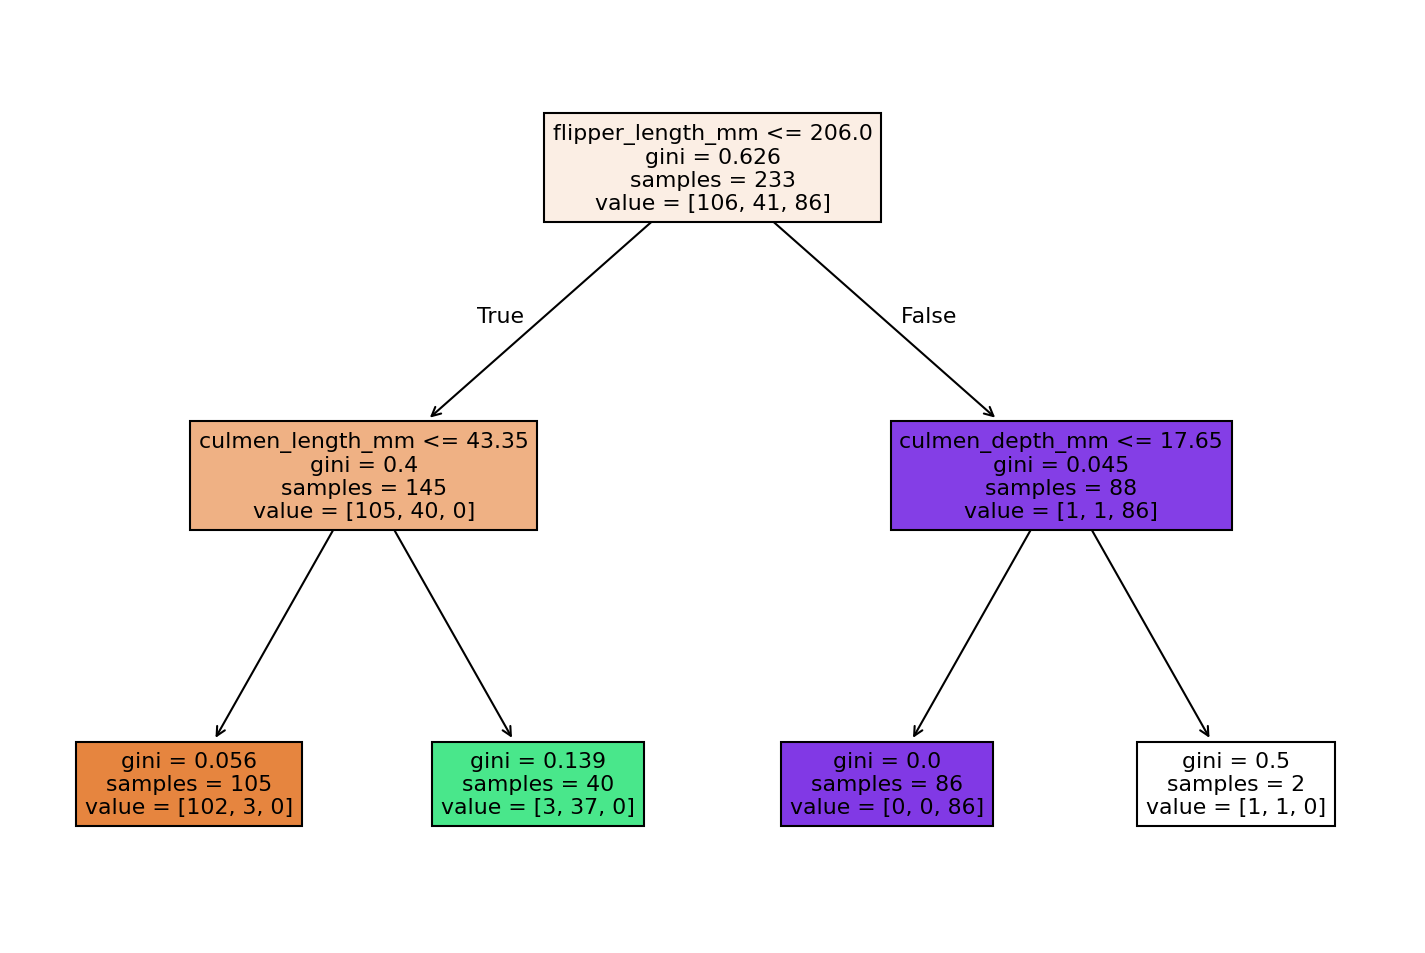

In [41]:
report_model(pruned_tree)

## Гиперпараметр "Max Leaf Nodes"

In [42]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





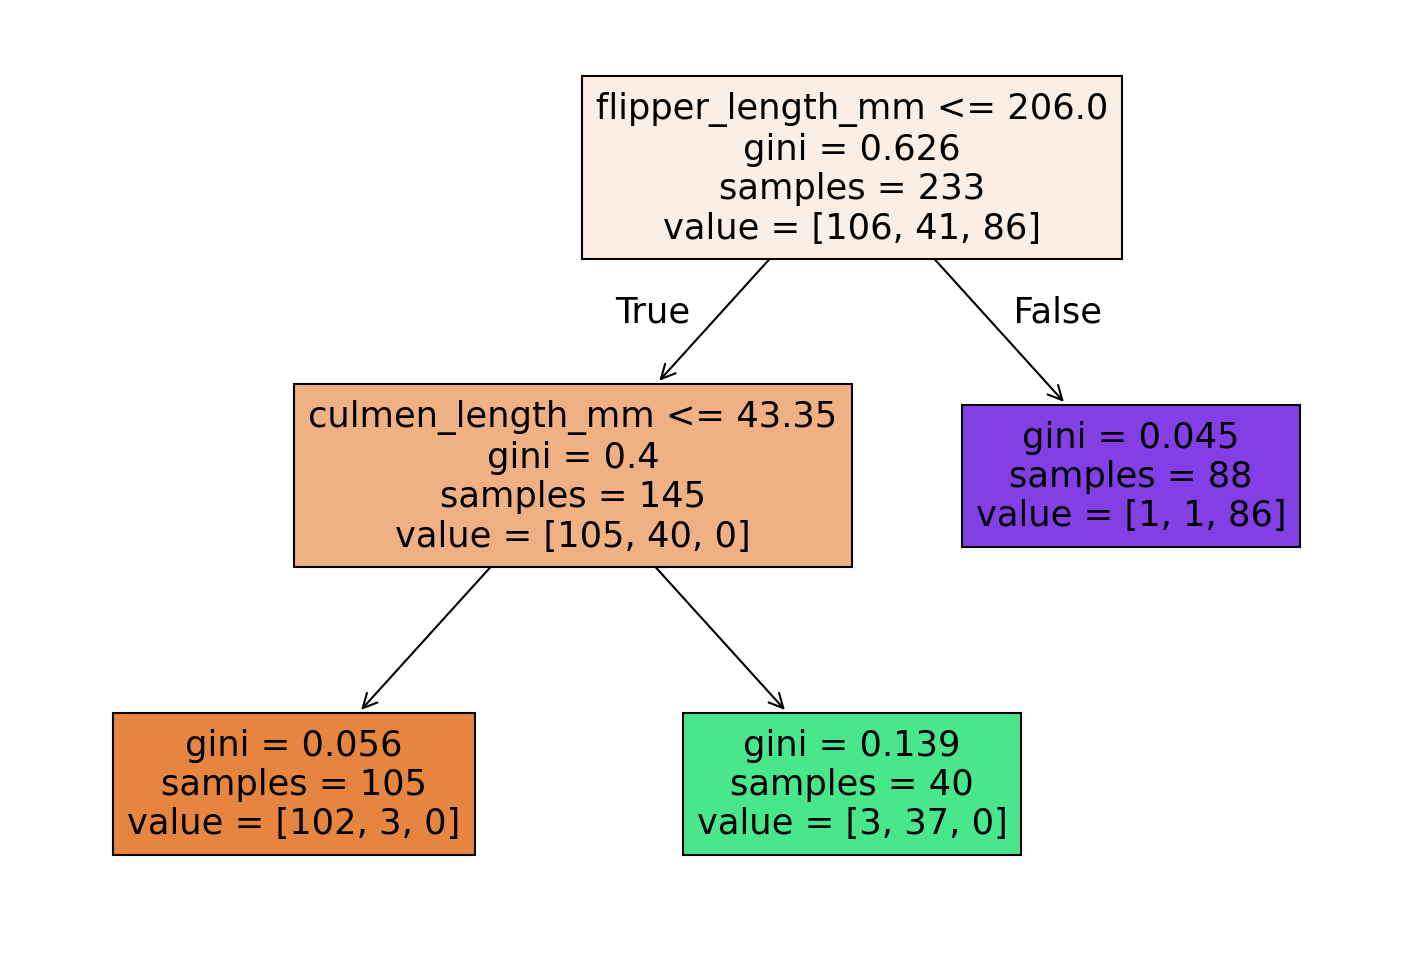

In [43]:
report_model(pruned_tree)

## Гиперпараметр "Criterion"

In [44]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100





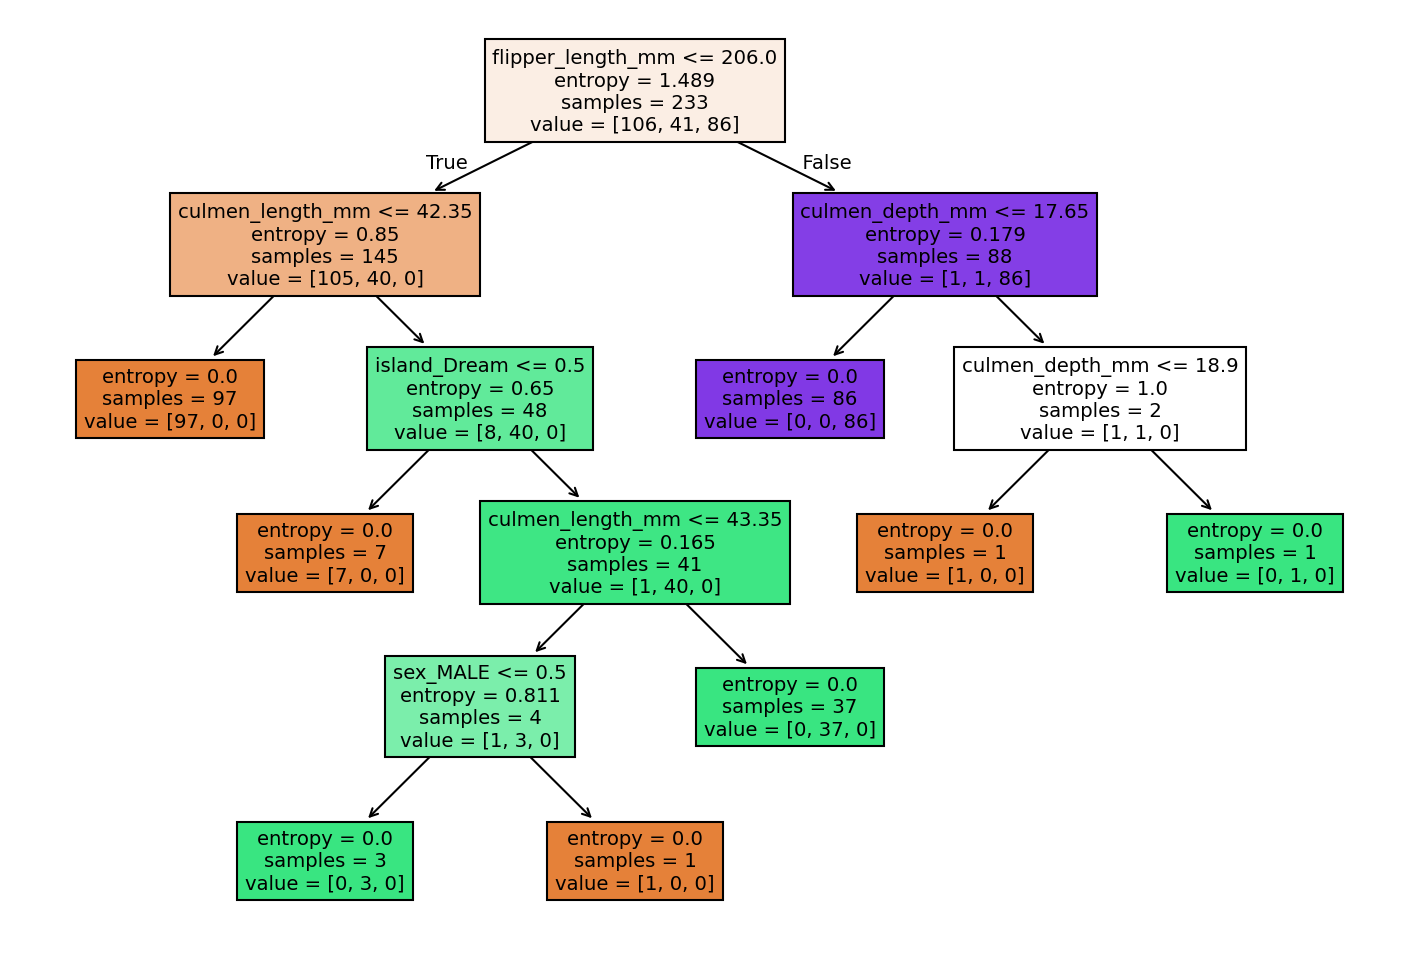

In [45]:
report_model(entropy_tree)

## Отличная работа!

---